In [ ]:
# Install the necessary packages.

!pip install pyspark
import numpy as np
import pandas as pd
import pyspark.pandas as ps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=974ae869940ba41eb3d2ff62c19da717250a6d0d61cbabef0ed7896cd8a2efff
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create a spark session.

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
insurance_csv = spark.read.csv("/content/drive/MyDrive/insurance_pricing_optimization_data.csv",header= 'True', inferSchema= 'True')
insurance_csv.show(10)

+-----------+---+------+--------------+------------+------------+----------------------+--------+---------------+----------------+-----------------+-------------------+-------------+------------------------+---------------+--------------+-----------+------------+-----------------------+------------+----------------+-----------+------------------+
|Customer ID|Age|Gender|Marital Status|  Occupation|Income Level|Geographic Information|Location|Behavioral Data|Purchase History|Policy Start Date|Policy Renewal Date|Claim History|Insurance Products Owned|Coverage Amount|Premium Amount|Policy Type|Risk Profile|Previous Claims History|Credit Score|  Driving Record|Life Events|Segmentation Group|
+-----------+---+------+--------------+------------+------------+----------------------+--------+---------------+----------------+-----------------+-------------------+-------------+------------------------+---------------+--------------+-----------+------------+-----------------------+------------+--

**Data Exploration**

In [ ]:
pdf = ps.DataFrame(insurance_csv)
pdf.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 53503 entries, 0 to 53502
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Customer ID               53503 non-null  int32 
 1   Age                       53503 non-null  int32 
 2   Gender                    53503 non-null  object
 3   Marital Status            53503 non-null  object
 4   Occupation                53503 non-null  object
 5   Income Level              53503 non-null  int32 
 6   Geographic Information    53503 non-null  object
 7   Location                  53503 non-null  int32 
 8   Behavioral Data           53503 non-null  object
 9   Purchase History          53503 non-null  object
 10  Policy Start Date         53503 non-null  object
 11  Policy Renewal Date       53503 non-null  object
 12  Claim History             53503 non-null  int32 
 13  Insurance Products Owned  53503 non-null  object
 14  Coverage Amount    

In [ ]:
# Check for the shape of the dataframe.

pdf.shape

# From the output we can say that there are 53503 observations and 23 variables.

(53503, 23)

**Descriptive Statistics**

In [ ]:
# Using the .describe() function to calculate the statistical measures such as mean, standard deviation, minium value, maximum value for every numerical column in the dataframe.

pdf.describe()

,Customer ID,Age,Income Level,Location,Claim History,Coverage Amount,Premium Amount,Risk Profile,Previous Claims History,Credit Score
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,53703.032017,2.522382,492580.789638,3023.702447,1.597107,1.669495,673.318562
std,28165.000067,15.079486,36651.075670,25404.953911,1.749397,268405.505571,1285.834295,1.135433,1.097238,99.226674
min,1.000000,18.000000,20001.000000,10000.000000,0.000000,50001.000000,500.000000,0.000000,0.000000,500.000000
25%,28940.000000,32.000000,51567.000000,31493.000000,1.000000,249606.000000,1817.000000,1.000000,1.000000,586.000000
50%,55850.000000,43.000000,80710.000000,55136.000000,3.000000,477251.000000,3193.000000,1.000000,2.000000,668.000000
75%,76091.000000,57.000000,115968.000000,74947.000000,4.000000,738950.000000,4311.000000,3.000000,3.000000,753.000000
max,100000.000000,70.000000,149999.000000,99999.000000,5.000000,1000000.000000,5000.000000,3.000000,3.000000,850.000000


In [ ]:
# By exploring the dataset, verifying the shape and using the info() function.

pdf.info()

# We can confirm that there are no null or missing values in the dataset.

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 53503 entries, 0 to 53502
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Customer ID               53503 non-null  int32 
 1   Age                       53503 non-null  int32 
 2   Gender                    53503 non-null  object
 3   Marital Status            53503 non-null  object
 4   Occupation                53503 non-null  object
 5   Income Level              53503 non-null  int32 
 6   Geographic Information    53503 non-null  object
 7   Location                  53503 non-null  int32 
 8   Behavioral Data           53503 non-null  object
 9   Purchase History          53503 non-null  object
 10  Policy Start Date         53503 non-null  object
 11  Policy Renewal Date       53503 non-null  object
 12  Claim History             53503 non-null  int32 
 13  Insurance Products Owned  53503 non-null  object
 14  Coverage Amount    

In [ ]:
#Checking the values of the categorical columns to retain the necessary columns. Using the .value_counts() function we are able check for the unique values in the columns and their repective counts.

print('Gender')
print(pdf['Gender'].value_counts())

print('Marital Status')
print(pdf['Marital Status'].value_counts())

print('Occupation')
print(pdf['Occupation'].value_counts())

print('Geographic Information')
print(pdf['Geographic Information'].value_counts())

print('Behavioral Data')
print(pdf['Behavioral Data'].value_counts())

print('Insurance Products Owned')
print(pdf['Insurance Products Owned'].value_counts())

print('Policy Type')
print(pdf['Policy Type'].value_counts())

print('Driving Record')
print(pdf['Driving Record'].value_counts())

print('Life Events')
print(pdf['Life Events'].value_counts())


Gender


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/base.py:1437: FutureWarning: The resulting Series will have a fixed name of 'count' from 4.0.0.
  warnings.warn(


Male      27499
Female    26004
Name: Gender, dtype: int64
Marital Status


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/base.py:1437: FutureWarning: The resulting Series will have a fixed name of 'count' from 4.0.0.
  warnings.warn(


Married      13219
Divorced     13151
Single        9195
Widowed       9077
Separated     8861
Name: Marital Status, dtype: int64
Occupation


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/base.py:1437: FutureWarning: The resulting Series will have a fixed name of 'count' from 4.0.0.
  warnings.warn(


Salesperson     7919
Entrepreneur    6636
Teacher         5906
Manager         5803
Lawyer          5775
Engineer        5704
Artist          5666
Doctor          5573
Nurse           4521
Name: Occupation, dtype: int64
Geographic Information


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/base.py:1437: FutureWarning: The resulting Series will have a fixed name of 'count' from 4.0.0.
  warnings.warn(


Lakshadweep                    2140
Himachal Pradesh               1963
Bihar                          1962
Haryana                        1931
Arunachal Pradesh              1903
Gujarat                        1895
Uttar Pradesh                  1855
Uttarakhand                    1758
Delhi                          1756
Madhya Pradesh                 1710
Andaman and Nicobar Islands    1678
Sikkim                         1654
Goa                            1605
Jharkhand                      1578
Nagaland                       1529
Daman and Diu                  1512
Mizoram                        1472
West Bengal                    1464
Assam                          1460
Chhattisgarh                   1451
Meghalaya                      1447
Andhra Pradesh                 1431
Maharashtra                    1428
Dadra and Nagar Haveli         1403
Manipur                        1391
Tripura                        1377
Chandigarh                     1376
Tamil Nadu                  

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/base.py:1437: FutureWarning: The resulting Series will have a fixed name of 'count' from 4.0.0.
  warnings.warn(


policy3    15761
policy1    10748
policy2    10729
policy5     9450
policy4     6815
Name: Behavioral Data, dtype: int64
Insurance Products Owned


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/base.py:1437: FutureWarning: The resulting Series will have a fixed name of 'count' from 4.0.0.
  warnings.warn(


policy1    13365
policy2    11964
policy3    10781
policy5    10668
policy4     6725
Name: Insurance Products Owned, dtype: int64
Policy Type


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/base.py:1437: FutureWarning: The resulting Series will have a fixed name of 'count' from 4.0.0.
  warnings.warn(


Group         18255
Business      13986
Family        12424
Individual     8838
Name: Policy Type, dtype: int64
Driving Record


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/base.py:1437: FutureWarning: The resulting Series will have a fixed name of 'count' from 4.0.0.
  warnings.warn(


Clean               15051
Major Violations    12060
DUI                  9787
Minor Violations     8562
Accident             8043
Name: Driving Record, dtype: int64
Life Events


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/base.py:1437: FutureWarning: The resulting Series will have a fixed name of 'count' from 4.0.0.
  warnings.warn(


Marriage      13463
Job Change    11400
Divorce       10229
Childbirth     9263
Retirement     9148
Name: Life Events, dtype: int64


**Data Visualization**

In [ ]:
# Importing necessary packages for data visualization.

import matplotlib.pyplot as plt

In [ ]:
# Converting the Insurance DataFrame to a Pandas DataFrame
pandas_df = insurance_csv.toPandas()

**Graph 1 - Coverage amount by location**



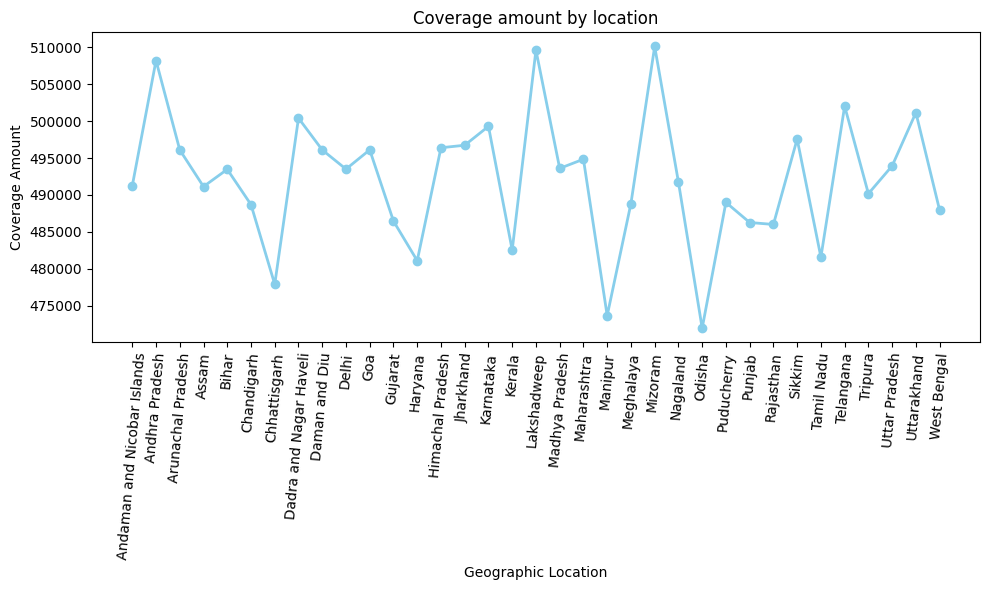

In [ ]:
grouped_df = pandas_df.groupby("Geographic Information")["Coverage Amount"].mean().reset_index()
padf = grouped_df.to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(padf[:, 0], padf[:, 1], marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.xlabel('Geographic Location')
plt.ylabel('Coverage Amount')
plt.title('Coverage amount by location')
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

**Graph 2 - Insurance products as per life events**

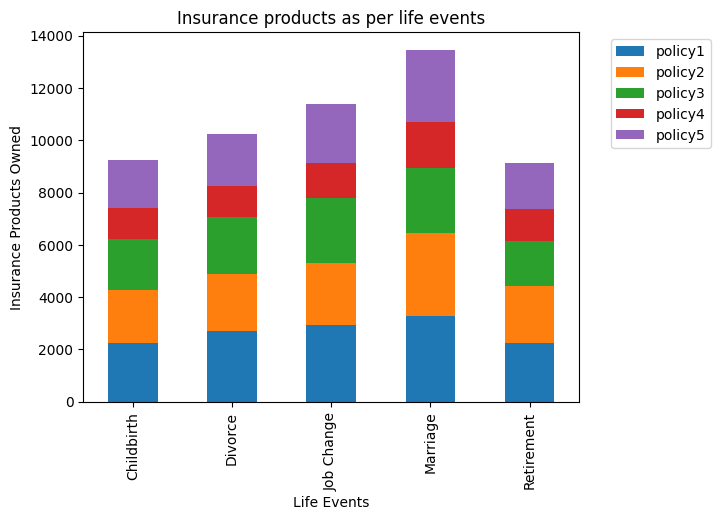

In [ ]:
# Group the data and calculate the sum for each group
grouped_data = pandas_df.groupby(['Life Events', 'Insurance Products Owned'])['Customer ID'].count().unstack()

# Plot the stacked bar chart
grouped_data.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Life Events')
plt.ylabel('Insurance Products Owned')
plt.title('Insurance products as per life events')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the chart
plt.show()


**Graph 3 - Premium amount by driving record and previous claims history**

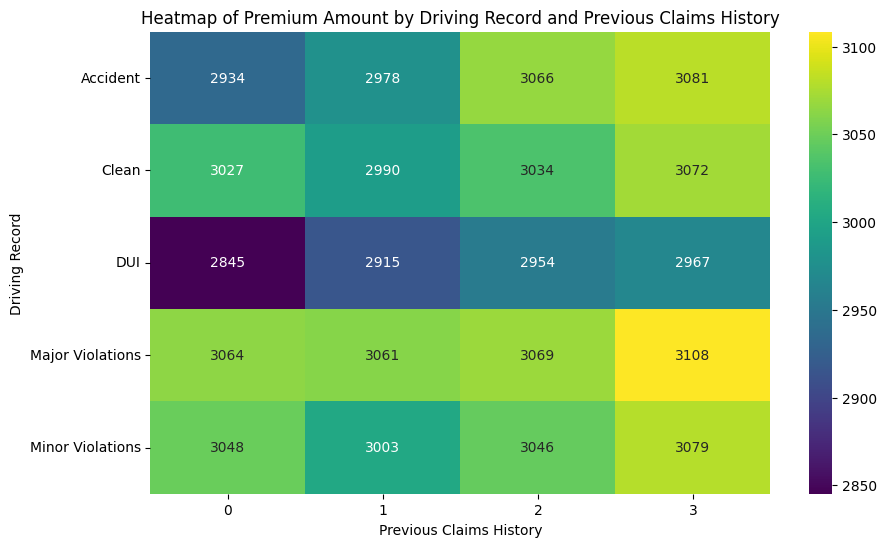

In [ ]:
# Importing seaborn package.
import seaborn as sns

heatmap_data = pandas_df.pivot_table(index='Driving Record', columns='Previous Claims History', values='Premium Amount', aggfunc=np.mean)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="viridis")

# Adding titles and labels
plt.title('Heatmap of Premium Amount by Driving Record and Previous Claims History')
plt.xlabel('Previous Claims History')
plt.ylabel('Driving Record')

# Show the plot
plt.show()


**Graph 4 - Age frequency**

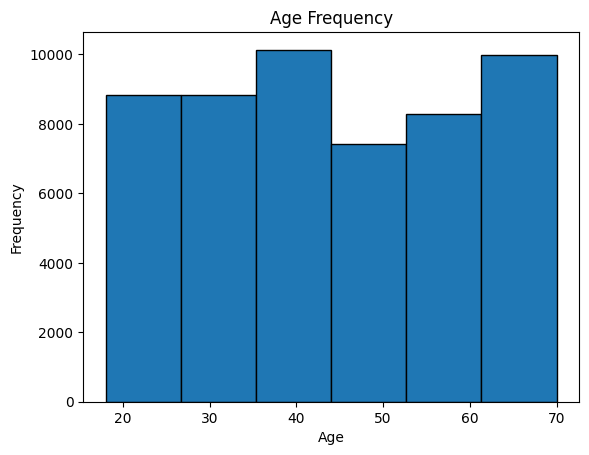

In [ ]:
# Plotting a histogram for the variable 'Age'.

plt.hist(pandas_df['Age'], bins=6, edgecolor='black')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency')

# Display the histogram
plt.show()

**Graph 5 - Distribution of income based on occupation**

Text(0.5, 1.0, 'Distribution of income based on occupation')

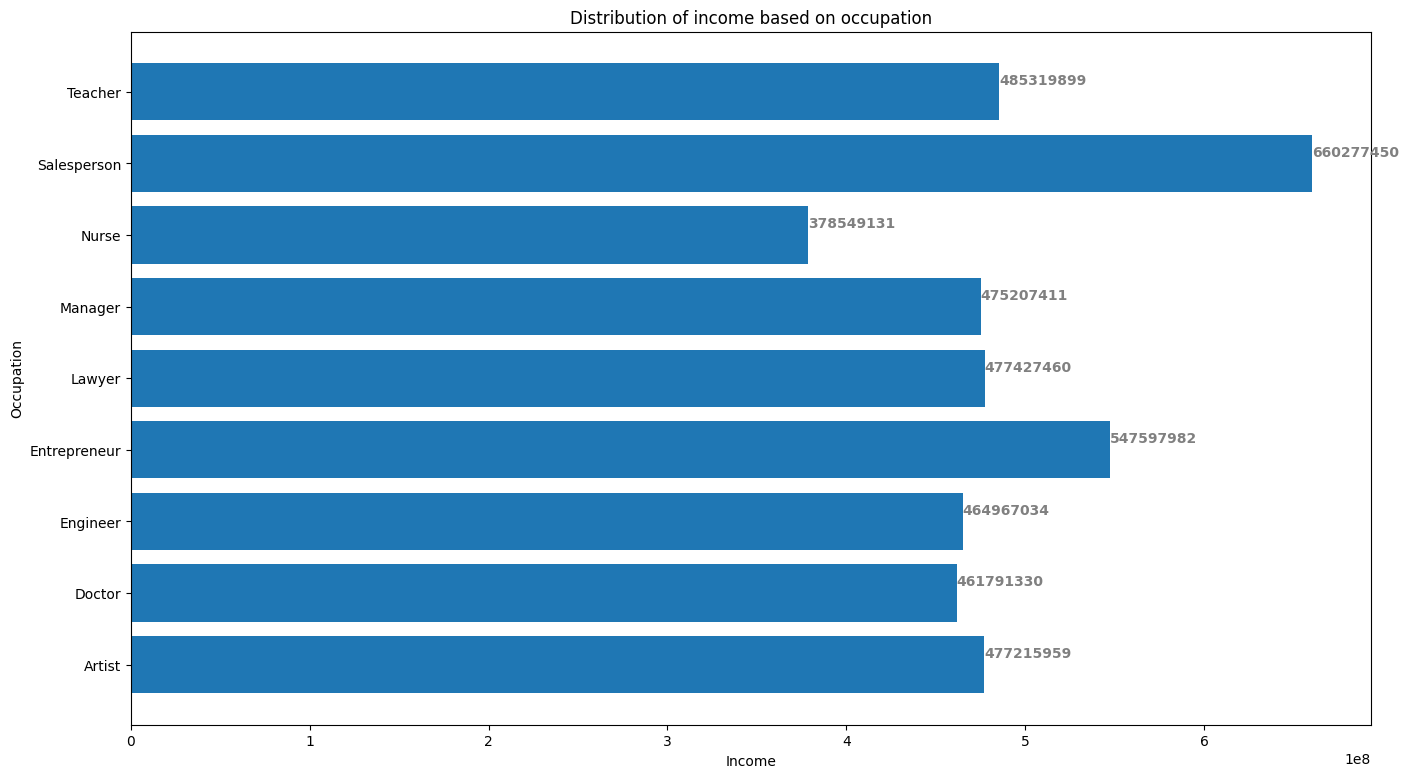

In [ ]:
occIncLevel = pandas_df.groupby('Occupation')['Income Level'].sum().reset_index(name = "Count")

# Adjust the figure size
fig, ax = plt.subplots(figsize=(16, 9))

# Create the horizontal bar chart
ax.barh(occIncLevel['Occupation'],occIncLevel['Count'])

# Add annotation to horizontal bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')

# Set labels and title for the horizontal chart
ax.set_ylabel('Occupation')
ax.set_xlabel('Income')
ax.set_title('Distribution of income based on occupation')

**Data Analysis**

In [ ]:
# Convert the insurance_csv DataFrame to a pandas DataFrame
pdf_pd = insurance_csv.toPandas()

# Create a new Spark DataFrame from the pandas DataFrame
pdf = spark.createDataFrame(pdf_pd)

# Print the DataFrame schema
pdf.printSchema()

root
 |-- Customer ID: long (nullable = true)
 |-- Age: long (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Marital Status: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Income Level: long (nullable = true)
 |-- Geographic Information: string (nullable = true)
 |-- Location: long (nullable = true)
 |-- Behavioral Data: string (nullable = true)
 |-- Purchase History: string (nullable = true)
 |-- Policy Start Date: string (nullable = true)
 |-- Policy Renewal Date: string (nullable = true)
 |-- Claim History: long (nullable = true)
 |-- Insurance Products Owned: string (nullable = true)
 |-- Coverage Amount: long (nullable = true)
 |-- Premium Amount: long (nullable = true)
 |-- Policy Type: string (nullable = true)
 |-- Risk Profile: long (nullable = true)
 |-- Previous Claims History: long (nullable = true)
 |-- Credit Score: long (nullable = true)
 |-- Driving Record: string (nullable = true)
 |-- Life Events: string (nullable = true)
 |-- Segm

**Model 1 - Linear Regression**

In [ ]:
# Importing the packages for the Linear Regression Analysis.

from pyspark.sql import SparkSession
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.sql.functions import to_date
import pyspark.sql.functions as F
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
# Initialize Spark session for Linear Regression.
spark = SparkSession.builder \
    .appName("Linear Regression") \
    .getOrCreate()

# creating a new variable lr_pdf and storing the dataframe pdf into lr_pdf
lr_pdf = pdf

# Drop unnecessary columns
drop_cols = ['Customer ID', 'Policy Start Date', 'Policy Renewal Date', 'Life Events', 'Segmentation Group']
lr_pdf = lr_pdf.drop(*drop_cols)


# Split the 'Driving Record' column into multiple columns
lr_pdf = lr_pdf.withColumn("Driving Record",
                             F.when(lr_pdf["Driving Record"] == "DUI", 1)
                             .when(lr_pdf["Driving Record"] == "Clean", 0)
                             .when(lr_pdf["Driving Record"] == "Major Violations", 2)
                             .when(lr_pdf["Driving Record"] == "Other", 3)
                             .otherwise(-1))


# Define categorical columns and numerical columns
categorical_cols = ['Gender', 'Marital Status', 'Occupation', 'Geographic Information', 'Behavioral Data', 'Purchase History', 'Policy Type', 'Insurance Products Owned']
numerical_cols = ['Age', 'Income Level', 'Claim History',  'Coverage Amount', 'Previous Claims History', 'Credit Score', 'Driving Record']

# Create indexers and encoders for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col+"_index", outputCol=col+"_vec") for col in categorical_cols]

# Assemble all columns into a single vector column
assembler = VectorAssembler(inputCols=[col+"_vec" for col in categorical_cols] + numerical_cols, outputCol="features")

# Define Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='Premium Amount')

# Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, lr])

# Split data into training and testing sets
train_data, test_data = lr_pdf.randomSplit([0.7, 0.3], seed=42)

# Fit the model
model = pipeline.fit(train_data)

# Make predictions
predictions = model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="Premium Amount", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

# Show some predictions
predictions.select("Occupation","Premium Amount", "prediction").show()


Root Mean Squared Error (RMSE) on test data = 1319.77
+------------+--------------+------------------+
|  Occupation|Premium Amount|        prediction|
+------------+--------------+------------------+
|    Engineer|          3049| 2297.385088093555|
|       Nurse|          3485| 2784.384085081294|
| Salesperson|          3330|  3514.89772712253|
| Salesperson|          1626| 2585.269802591648|
|      Doctor|          3876| 3612.579625791464|
|      Doctor|          4324| 2639.140608533173|
|Entrepreneur|          1958| 3373.959621421274|
|     Manager|          1668|  3104.03552569202|
| Salesperson|          3460| 3334.133212589096|
| Salesperson|          2938|3299.3671773315887|
|     Teacher|          3478|3303.5280555274885|
|       Nurse|          2825| 3250.533398918253|
|     Teacher|          2383|3079.5688089506934|
|      Doctor|          4663|2651.3974507820035|
|    Engineer|          3171| 3102.707238919401|
|    Engineer|          1735|2782.8357304392666|
|Entrepreneur| 

**Model 2 - Decision Tree**

In [ ]:
# Import necessary packages for Decision Tree

from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import DecisionTreeRegressor

In [ ]:
# Create a Spark session
spark = SparkSession.builder \
    .appName("Decision Tree Regressor ") \
    .getOrCreate()


# Convert categorical variables into numerical using StringIndexer
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(pdf) for column in ['Gender', 'Marital Status', 'Occupation', 'Geographic Information', 'Behavioral Data', 'Purchase History', 'Policy Start Date', 'Policy Renewal Date', 'Insurance Products Owned', 'Policy Type', 'Driving Record', 'Life Events', 'Segmentation Group']]

# Combine indexed features into a single feature vector
assembler = VectorAssembler(inputCols=[column+"_index" for column in ['Gender', 'Marital Status', 'Occupation', 'Geographic Information', 'Behavioral Data', 'Purchase History', 'Policy Start Date', 'Policy Renewal Date', 'Insurance Products Owned', 'Policy Type', 'Driving Record', 'Life Events', 'Segmentation Group']] + ['Age', 'Income Level', 'Location', 'Claim History', 'Coverage Amount', 'Risk Profile', 'Previous Claims History', 'Credit Score'], outputCol="features")

# Instantiate a DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol="features", labelCol="Premium Amount", maxBins=2016)

# Define the pipeline
pipeline = Pipeline(stages=indexers + [assembler, dt])

# Fit the model
model = pipeline.fit(pdf)

# Make predictions
predictions = model.transform(pdf)

evaluator = RegressionEvaluator(labelCol="Premium Amount", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

print("RMSE:", rmse)

# Show the resulting predictions
predictions.select("Occupation", "prediction", "Premium Amount").show()





RMSE: 1080.168125744777
+------------+------------------+--------------+
|  Occupation|        prediction|Premium Amount|
+------------+------------------+--------------+
|Entrepreneur| 3955.573436742608|          2749|
|     Manager|1901.4476956839794|          1966|
|Entrepreneur|3150.3711171662126|          4413|
|Entrepreneur| 3227.143605412484|          4342|
|     Manager| 2431.034462269756|          1276|
|       Nurse| 1966.916102841678|          1106|
|     Manager|3571.6245076586433|          3661|
|      Artist| 2170.181554524362|          1148|
| Salesperson| 1966.916102841678|          2612|
|      Artist| 4175.166469428008|          4595|
|      Artist| 2928.913626609442|          2935|
|      Lawyer|3785.9400099157165|          4517|
|     Teacher|3150.3711171662126|          2861|
|Entrepreneur| 3516.759383378016|          3971|
|      Doctor| 4175.166469428008|          2760|
|    Engineer| 2361.012232415902|          2334|
|      Artist|3873.3025510204084|          46

Model 3 - Clustering Analysis

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType, DoubleType, StringType
from pyspark.ml.feature import StandardScaler, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer

In [ ]:
# Create a SparkSession
spark = SparkSession.builder \
    .appName("Clustering Analysis") \
    .getOrCreate()

# creating a new variables and storing the pdf data into it.
ca_pdf = pdf

# Dropping columns that dont have much impact for the analysis.
data = ca_pdf.drop('Customer ID', 'Policy Start Date', 'Policy Renewal Date', 'Claim History')

# Define numerical and categorical features
numerical_features = [col for col, dtype in data.dtypes if dtype in ['int', 'bigint', 'double']]
categorical_features = [col for col, dtype in data.dtypes if dtype == 'string']

# Create indexers for categorical features
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid='keep') for col in categorical_features]

# Apply OneHotEncoder to categorical features
encoder = OneHotEncoder(inputCols=[f"{col}_index" for col in categorical_features],
                        outputCols=[f"{col}_encoded" for col in categorical_features])

# Combine all features into a single vector
assembler = VectorAssembler(inputCols=numerical_features + [f"{col}_encoded" for col in categorical_features],
                            outputCol="features")

# Preprocessing pipeline
preprocessor = Pipeline(stages=indexers + [encoder, assembler])

# Clustering pipeline
kmeans = KMeans(featuresCol="features", predictionCol="Cluster", k=5, seed=42)

pipeline = Pipeline(stages=[preprocessor, kmeans])

# Fit pipeline
model = pipeline.fit(data)

# Transform data and add cluster labels
clustered_data = model.transform(data)

# Output cluster counts
print(clustered_data.groupBy('Cluster').count().show())


+-------+-----+
|Cluster|count|
+-------+-----+
|      1|13639|
|      3|10086|
|      4|11856|
|      2| 7179|
|      0|10743|
+-------+-----+

None


In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Create a SparkSession object
spark = SparkSession.builder.appName('ModeGenderPerCluster').getOrCreate()

# Assuming 'clustered_data' is a DataFrame object

# Group by 'Cluster' and 'Gender', then calculate the mode
mode_gender_per_cluster = clustered_data.groupBy('Cluster', 'Gender').agg(F.count('*').alias('count'))
mode_gender_per_cluster = mode_gender_per_cluster.withColumn('rank', F.row_number().over(Window.partitionBy('Cluster').orderBy(F.desc('count'))))
mode_gender_per_cluster = mode_gender_per_cluster.filter(F.col('rank') == 1).drop('rank')

# Print the result
print(mode_gender_per_cluster)

# Convert the mode_gender_per_cluster DataFrame to Pandas DataFrame for easier display
mode_gender_per_cluster_pandas = mode_gender_per_cluster.toPandas()

# Print the result
print(mode_gender_per_cluster_pandas)

DataFrame[Cluster: int, Gender: string, count: bigint]
   Cluster  Gender  count
0        0  Female   5379
1        1    Male   6993
2        2    Male   3621
3        3    Male   5388
4        4    Male   6133


In [ ]:
# Import necessary libraries
from pyspark.sql import functions as F

# Group by 'Cluster' and 'Gender', then calculate the mode
mode_gender_per_cluster = clustered_data.groupBy('Cluster', 'Gender').agg(F.count('*').alias('count'))
mode_gender_per_cluster = mode_gender_per_cluster.withColumn('rank', F.row_number().over(Window.partitionBy('Cluster').orderBy(F.desc('count'))))
mode_gender_per_cluster = mode_gender_per_cluster.filter(F.col('rank') == 1).drop('rank')

# Print the result
print(mode_gender_per_cluster)

# Convert the mode_gender_per_cluster DataFrame to Pandas DataFrame for easier display
mode_gender_per_cluster_pandas = mode_gender_per_cluster.toPandas()

# Print the result
print(mode_gender_per_cluster_pandas)

DataFrame[Cluster: int, Gender: string, count: bigint]
   Cluster  Gender  count
0        0  Female   5379
1        1    Male   6993
2        2    Male   3621
3        3    Male   5388
4        4    Male   6133


In [ ]:
from pyspark.sql import functions as F

# Group by 'Cluster' and 'Gender', then calculate the mode
mode_gender_per_cluster = clustered_data.groupBy('Cluster', 'Gender').agg(F.mode('Gender').alias('Mode_Gender'))

# Print the result
print(mode_gender_per_cluster)

# Convert the mode_gender_per_cluster DataFrame to Pandas DataFrame for easier display
mode_gender_per_cluster_pandas = mode_gender_per_cluster.toPandas()

# Print the result
print(mode_gender_per_cluster_pandas)

DataFrame[Cluster: int, Gender: string, Mode_Gender: string]
   Cluster  Gender Mode_Gender
0        4  Female      Female
1        3  Female      Female
2        4    Male        Male
3        1  Female      Female
4        2    Male        Male
5        2  Female      Female
6        0    Male        Male
7        3    Male        Male
8        1    Male        Male
9        0  Female      Female


In [ ]:
from pyspark.sql.functions import col, max
from pyspark.sql import Window
from pyspark.sql.functions import col, max, mode

# Assume 'clustered_data' is your DataFrame containing the results from K-means clustering

# Group by Cluster and gender, income, occupation, then count each group
gender_freq = clustered_data.groupBy("Cluster", "gender").count()
income_freq = clustered_data.groupBy("Cluster", "Income Level").count()

# Print results directly in Python
for row in gender_freq:
    print(f"Cluster: {row['Cluster']}, Gender: {row['gender']}, Count: {row['count']}")

for row in income_freq:
    print(f"Cluster: {row['Cluster']}, Income: {row['income']}, Count: {row['count']}")

print(gender_freq)
print(income_freq)

print(gender_freq, income_freq)



Cluster: Column<'Cluster[Cluster]'>, Gender: Column<'Cluster[gender]'>, Count: Column<'Cluster[count]'>
Cluster: Column<'gender[Cluster]'>, Gender: Column<'gender[gender]'>, Count: Column<'gender[count]'>
Cluster: Column<'count[Cluster]'>, Gender: Column<'count[gender]'>, Count: Column<'count[count]'>
Cluster: Column<'Cluster[Cluster]'>, Income: Column<'Cluster[income]'>, Count: Column<'Cluster[count]'>
Cluster: Column<'Income Level[Cluster]'>, Income: Column<'Income Level[income]'>, Count: Column<'Income Level[count]'>
Cluster: Column<'count[Cluster]'>, Income: Column<'count[income]'>, Count: Column<'count[count]'>
DataFrame[Cluster: int, gender: string, count: bigint]
DataFrame[Cluster: int, Income Level: bigint, count: bigint]
DataFrame[Cluster: int, gender: string, count: bigint] DataFrame[Cluster: int, Income Level: bigint, count: bigint]


In [ ]:
gender_freq = clustered_data.groupBy("Cluster", "gender").count()
income_freq = clustered_data.groupBy("Cluster", "Income Level").count()

gender_freq_list = gender_freq.collect()
income_freq_list = income_freq.collect()

# Print results directly in Python
for row in gender_freq_list:
    print(f"Cluster: {row['Cluster']}, Gender: {row['gender']}, Count: {row['count']}")

for row in income_freq_list:
    print(f"Cluster: {row['Cluster']}, Income: {row['Income Level']}, Count: {row['count']}")

# Optionally, convert to Pandas DataFrame and display
gender_freq_pd = gender_freq.toPandas()
income_freq_pd = income_freq.toPandas()
print(gender_freq_pd)
print(income_freq_pd)

print(gender_freq, income_freq)

Streaming output truncated to the last 5000 lines.
Cluster: 2, Income: 50031, Count: 1
Cluster: 1, Income: 101606, Count: 1
Cluster: 4, Income: 118994, Count: 1
Cluster: 0, Income: 67432, Count: 1
Cluster: 2, Income: 71181, Count: 1
Cluster: 4, Income: 94366, Count: 1
Cluster: 4, Income: 123767, Count: 1
Cluster: 1, Income: 80348, Count: 1
Cluster: 0, Income: 48880, Count: 1
Cluster: 3, Income: 36547, Count: 1
Cluster: 0, Income: 49311, Count: 1
Cluster: 2, Income: 27560, Count: 1
Cluster: 2, Income: 23228, Count: 1
Cluster: 4, Income: 59913, Count: 1
Cluster: 3, Income: 40041, Count: 1
Cluster: 3, Income: 39952, Count: 1
Cluster: 3, Income: 145479, Count: 1
Cluster: 4, Income: 93798, Count: 1
Cluster: 1, Income: 124142, Count: 1
Cluster: 4, Income: 100546, Count: 1
Cluster: 4, Income: 86703, Count: 1
Cluster: 2, Income: 95924, Count: 1
Cluster: 0, Income: 131193, Count: 2
Cluster: 2, Income: 97203, Count: 1
Cluster: 2, Income: 94834, Count: 1
Cluster: 1, Income: 77241, Count: 1
Cluste

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

In [ ]:
# Assuming categorical and numerical columns are already defined
assembler = VectorAssembler(inputCols=[col+"_vec" for col in categorical_cols] + ['Income Level'], outputCol="features")


In [ ]:
sdf = spark.createDataFrame(pdf.toLocalIterator())
sdf.columns

['Customer ID',
 'Age',
 'Gender',
 'Marital Status',
 'Occupation',
 'Income Level',
 'Geographic Information',
 'Location',
 'Behavioral Data',
 'Purchase History',
 'Policy Start Date',
 'Policy Renewal Date',
 'Claim History',
 'Insurance Products Owned',
 'Coverage Amount',
 'Premium Amount',
 'Policy Type',
 'Risk Profile',
 'Previous Claims History',
 'Credit Score',
 'Driving Record',
 'Life Events',
 'Segmentation Group']

In [ ]:
# Configure K-means algorithm
kmeans = KMeans(featuresCol='features', k=3, seed=42)  # Adjust k based on analysis

# Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, kmeans])

# Evaluate clustering by computing Silhouette score (optional)
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator()

# Show resulting clusters
predictions.select('Gender', 'Age', 'Income Level', 'prediction').show()


+------+---+------------+------------------+
|Gender|Age|Income Level|        prediction|
+------+---+------------+------------------+
|Female| 23|       70541| 3955.573436742608|
|  Male| 26|       54168|1901.4476956839794|
|Female| 29|       73899|3150.3711171662126|
|  Male| 20|       63381| 3227.143605412484|
|Female| 25|       38794| 2431.034462269756|
|Female| 41|       87188| 1966.916102841678|
|  Male| 55|       94891|3571.6245076586433|
|  Male| 35|       61003| 2170.181554524362|
|Female| 43|      116249| 1966.916102841678|
|Female| 32|       49083| 4175.166469428008|
|  Male| 69|       62099| 2928.913626609442|
|Female| 47|      110698|3785.9400099157165|
|Female| 31|       90301|3150.3711171662126|
|Female| 65|       24648| 3516.759383378016|
|  Male| 64|      105009| 4175.166469428008|
|  Male| 53|       29783| 2361.012232415902|
|Female| 69|      114236|3873.3025510204084|
|Female| 48|      107359| 3227.143605412484|
|  Male| 53|       49224|3785.9400099157165|
|  Male| 6

In [ ]:
# Configure K-means algorithm
kmeans = KMeans(featuresCol='features', k=3, seed=42)  # Adjust k based on analysis

# Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, kmeans])

# Fit the model
model = pipeline.fit(ca_pdf)

# Make predictions (clusters)
predictions = model.transform(ca_pdf)

# Evaluate clustering by computing Silhouette score (optional)
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Show resulting clusters
predictions.select('Income Level', 'Gender', 'prediction').show()

Silhouette with squared euclidean distance = 0.7572953717374109
+------------+------+----------+
|Income Level|Gender|prediction|
+------------+------+----------+
|       70541|Female|         2|
|       54168|  Male|         0|
|       73899|Female|         2|
|       63381|  Male|         2|
|       38794|Female|         0|
|       87188|Female|         2|
|       94891|  Male|         2|
|       61003|  Male|         0|
|      116249|Female|         1|
|       49083|Female|         0|
|       62099|  Male|         0|
|      110698|Female|         1|
|       90301|Female|         2|
|       24648|Female|         0|
|      105009|  Male|         1|
|       29783|  Male|         0|
|      114236|Female|         1|
|      107359|Female|         1|
|       49224|  Male|         0|
|      117264|  Male|         1|
+------------+------+----------+
only showing top 20 rows



In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline
import pandas as pd

# Create a Spark session
spark = SparkSession.builder \
    .appName("Gender-Based Clustering") \
    .getOrCreate()

# Index and encode the 'Gender' column
gender_indexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
gender_encoder = OneHotEncoder(inputCols=["GenderIndex"], outputCols=["GenderEncoded"])

# Assemble features
assembler = VectorAssembler(inputCols=["GenderEncoded", "Age", "Income Level"], outputCol="features")

# K-means clustering
kmeans = KMeans(featuresCol="features", k=5, seed=42)  # Using 5 clusters as an example

# Create a Pipeline
pipeline = Pipeline(stages=[gender_indexer, gender_encoder, assembler, kmeans])

# Fit the model
model = pipeline.fit(pdf)

# Make predictions
predictions = model.transform(pdf)

# Show the results
predictions.select("Gender", "Age", "Income Level", "prediction").show()

# Stop Spark session
spark.stop()


+------+---+------------+----------+
|Gender|Age|Income Level|prediction|
+------+---+------------+----------+
|Female| 23|       70541|         0|
|  Male| 26|       54168|         0|
|Female| 29|       73899|         0|
|  Male| 20|       63381|         0|
|Female| 25|       38794|         3|
|Female| 41|       87188|         2|
|  Male| 55|       94891|         2|
|  Male| 35|       61003|         0|
|Female| 43|      116249|         1|
|Female| 32|       49083|         0|
|  Male| 69|       62099|         0|
|Female| 47|      110698|         1|
|Female| 31|       90301|         2|
|Female| 65|       24648|         3|
|  Male| 64|      105009|         1|
|  Male| 53|       29783|         3|
|Female| 69|      114236|         1|
|Female| 48|      107359|         1|
|  Male| 53|       49224|         0|
|  Male| 62|      117264|         1|
+------+---+------------+----------+
only showing top 20 rows

